# SETD2 cis comparison

SETD2 is a tumor suppressor and the "main enzyme generating H3K36me3, a specific tag for epigenetic transcriptional activation" which is also involved in DNA repair pathways. SETD2 is involved with chromatin remodeling and DNA repair (regulating mismatch repair in G1, and required for repair of double- strand breaks). More informatiion can be found at the  Uniprot webpage: https://www.uniprot.org/uniprot/Q9BYW2

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the mutation frequency of SETD2 for Kidney Cancer

In [2]:
cancer = cptac.RenalCcrcc()
desired_cutoff = 0.1
gene = 'SETD2'

freq_mut = al.get_frequently_mutated(cancer, cutoff = desired_cutoff)
freq_mut.loc[freq_mut['Gene'] == gene]

,Gene,Unique_Samples_Mut,Missense_Mut,Truncation_Mut
3,SETD2,0.136364,0.018182,0.118182


## Step 3: cis comparisons for omics 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. These steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.

The format_cis_comparison_data does the first 3 steps.

# Proteomics cis comparison

Proteomics: Mutated and Wildtype

In [3]:
prot_mut_status = f.format_cis_comparison_data(cancer, 'proteomics', gene)

prot_col_list = [gene+'_proteomics']
prot_col = gene+"_proteomics"

# Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
print("Doing t-test comparison\n")
prot_pval_results = al.wrap_ttest(prot_mut_status, 'binary_mutations', prot_col_list)
print(prot_pval_results)

Doing t-test comparison

         Comparison   P_Value
0  SETD2_proteomics  0.000078


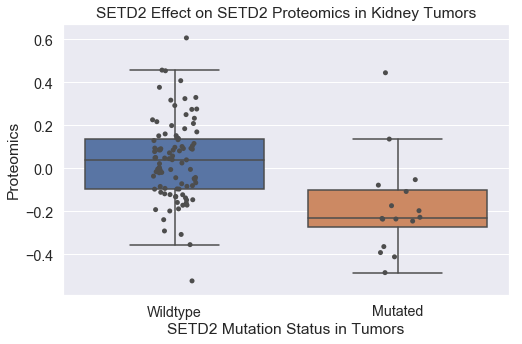

In [4]:
# Step 5 - Create boxplt to compare wildtype and mutated effect on omics data
plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.3)
cis_boxplot = sns.boxplot(data = prot_mut_status, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on " + gene + " Proteomics in Kidney Tumors")
cis_boxplot = sns.stripplot(data= prot_mut_status, x = 'binary_mutations',
                            y = prot_col,jitter = True, color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
#cis_boxplot.set_xticklabels(cis_boxplot.get_xticklabels(),rotation = 50)
plt.show()
plt.clf()
plt.close()

Proteomics: Missense and Truncation compared to wildtype

In [5]:
prot_mut_type = f.get_missense_truncation_comparison(cancer, 'proteomics', gene)
prot_wildtype = prot_mut_status.loc[prot_mut_status['binary_mutations'] == 'Wildtype'] # select all wildtype from binary_mutations
prot_mut_and_wildtype = prot_mut_type.append(prot_wildtype, sort=False) # use for graph

# compare missense and wildtype
prot_miss_wt = prot_mut_and_wildtype.loc[prot_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
prot_results_miss = al.wrap_ttest(prot_miss_wt, 'binary_mutations', prot_col_list)
print(prot_results_miss)

# compare truncation and wildtype
prot_trunc_wt = prot_mut_and_wildtype.loc[prot_mut_and_wildtype['binary_mutations'] != 'Missense']
print("\n\nDoing t-test comparison for truncation and wildtype\n")
prot_results_trunc = al.wrap_ttest(prot_trunc_wt, 'binary_mutations', prot_col_list)
print(prot_results_trunc)

Doing t-test comparison for missense and wildtype

No significant comparisons.
None


Doing t-test comparison for truncation and wildtype

         Comparison   P_Value
0  SETD2_proteomics  0.000214


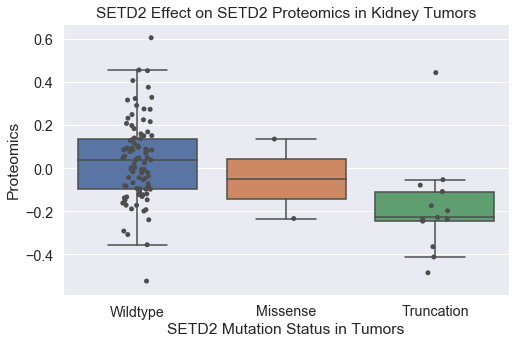

In [6]:
prot_cis_boxplot = sns.boxplot(data = prot_mut_and_wildtype, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Missense","Truncation"], showfliers = False)  
prot_cis_boxplot.set_title(gene + " Effect on "+gene+" Proteomics in Kidney Tumors")
prot_cis_boxplot = sns.stripplot(data= prot_mut_and_wildtype, x = 'binary_mutations',
                            y = prot_col, jitter = True, color = ".3", order = ["Wildtype","Missense","Truncation"])
prot_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()
plt.clf()
plt.close()

# Transcriptomics cis comparison

Transcriptomics: Mutated and Wildtype

In [7]:
trans_mut_status = f.format_cis_comparison_data(cancer, 'transcriptomics', gene)

trans_col_list = [gene+'_transcriptomics']

print("Doing t-test comparison for mutation status\n")
trans_pval_results = al.wrap_ttest(trans_mut_status, 'binary_mutations', trans_col_list)
print(trans_pval_results)

Doing t-test comparison for mutation status

              Comparison   P_Value
0  SETD2_transcriptomics  0.031764


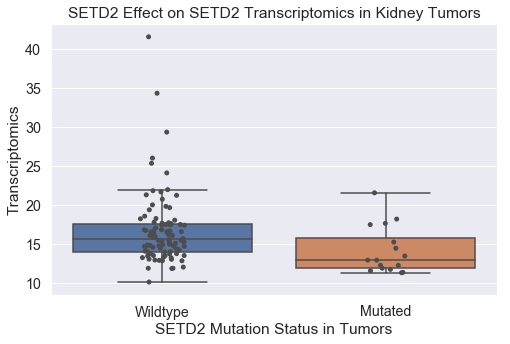

In [8]:
trans_col = gene+'_transcriptomics'

plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.3)
cis_boxplot = sns.boxplot(data = trans_mut_status, x = 'binary_mutations',
                          y = trans_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on " + gene +" Transcriptomics in Kidney Tumors")
cis_boxplot = sns.stripplot(data = trans_mut_status, x = 'binary_mutations',y = trans_col, jitter = True, 
                        color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()
plt.clf()
plt.close()

Transcriptomics: Missense and Truncation

In [9]:
# select all wildtype from earlier -add to mut_type binary column
trans_wildtype = trans_mut_status.loc[trans_mut_status['binary_mutations'] == 'Wildtype'] 
trans_mut_type = f.get_missense_truncation_comparison(cancer, 'transcriptomics', gene)
trans_mut_and_wildtype = trans_mut_type.append(trans_wildtype, sort=False) # use for graph


trans_col_list = [gene+'_transcriptomics']
# compare missense and wildtype
miss_wt = trans_mut_and_wildtype.loc[trans_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
results_prot_miss = al.wrap_ttest(miss_wt, 'binary_mutations', trans_col_list)
print(results_prot_miss)

# compare truncation and wildtype
trunc_wt = trans_mut_and_wildtype.loc[trans_mut_and_wildtype['binary_mutations'] != 'Missense']
print("\n\nDoing t-test comparison for truncation and wildtype\n")
results_prot_trunc = al.wrap_ttest(trunc_wt, 'binary_mutations', trans_col_list)
print(results_prot_trunc)

Doing t-test comparison for missense and wildtype

No significant comparisons.
None


Doing t-test comparison for truncation and wildtype

No significant comparisons.
None


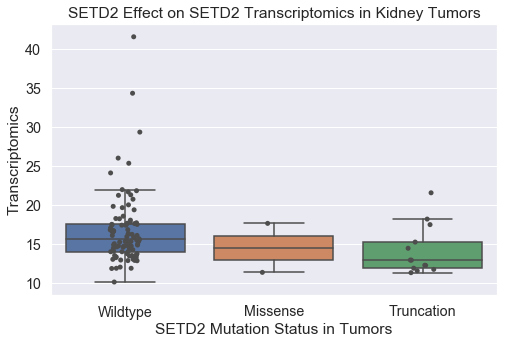

In [10]:
plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.3)
trans_cis_boxplot = sns.boxplot(data = trans_mut_and_wildtype, x = 'binary_mutations',
                          y = trans_col, order = ["Wildtype","Missense","Truncation"], showfliers = False)  
trans_cis_boxplot.set_title(gene + " Effect on " + gene +" Transcriptomics in Kidney Tumors")
trans_cis_boxplot = sns.stripplot(data = trans_mut_and_wildtype, x = 'binary_mutations',y = trans_col, jitter = True, 
                        color = ".3", order = ["Wildtype","Missense","Truncation"])
trans_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()
plt.clf()
plt.close()

# Phosphoproteomics cis comparison

Phosphoproteomics: Mutated and Wildtype

In [11]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
omics_and_mut = cancer.join_omics_to_mutations(
    mutations_genes = gene, omics_df_name = 'phosphoproteomics', omics_genes = gene)

# Step 2 - Create the binary column needed to do the comparison
omics_and_mut['binary_mutations'] = omics_and_mut[gene+'_Mutation_Status'].apply(
    lambda x: 'Wildtype' if x == 'Wildtype_Tumor' else 'Mutated')

# Step 3 - Format
omics_and_mut = omics_and_mut.query('Sample_Status != "Normal"') # changed because warning with slice
#tumors = omics_and_mut.loc[omics_and_mut['Sample_Status'] == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
binary_phospho = omics_and_mut.drop(columns_to_drop, axis = 1)
only_phospho = binary_phospho.drop('binary_mutations', axis = 1)
#omics_and_mut['binary_mutations'].value_counts()

In [12]:
phos_col_list = list(only_phospho.columns)

# Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
print("Doing t-test comparison for mutation status\n")
phos_pval_results = al.wrap_ttest(binary_phospho, 'binary_mutations', phos_col_list)
phos_pval_results

Doing t-test comparison for mutation status

Incorrectly Formatted Dataframe!


Graph

In [13]:
# Create data frame with all significant phospho sites in order to graph
phospho_list = list(only_phospho.columns)
phospho_df = pd.melt(binary_phospho, id_vars = 'binary_mutations', 
            value_vars = phospho_list, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
phospho_df.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names
#sig_phospho_df.dropna(axis=0)

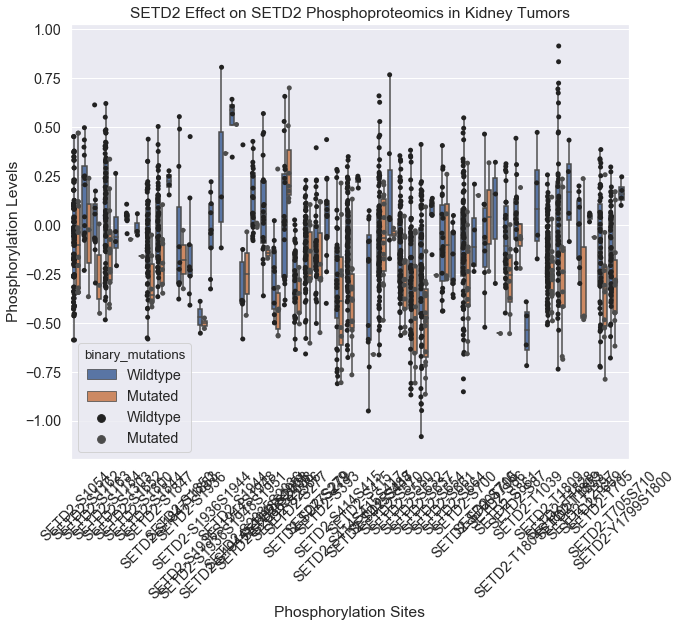

In [14]:
plt.rcParams['figure.figsize']=(10,8) #size of plot
sns.set(font_scale = 1.3)
cis_boxplot = sns.boxplot(data = phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                             hue_order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on " + gene + " Phosphoproteomics in Kidney Tumors")
cis_boxplot = sns.stripplot(data = phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                               hue_order = ["Wildtype","Mutated"], jitter = True, color = ".3", dodge = True)
cis_boxplot.set(xlabel = 'Phosphorylation Sites', ylabel = "Phosphorylation Levels")
cis_boxplot.set_xticklabels(cis_boxplot.get_xticklabels(),rotation = 45)
plt.show()
plt.clf()
plt.close()

Phosphoproteomics: Missense and Truncation

In [15]:
# select all wildtype from earlier -add to mut_type binary column
phos_wildtype = binary_phospho.loc[binary_phospho['binary_mutations'] == 'Wildtype'] 

phos_mut_type = f.get_missense_truncation_comparison(cancer, 'phosphoproteomics', gene)
phos_mut_and_wildtype = phos_mut_type.append(phos_wildtype, sort=True) 

AssertionError: Number of manager items must equal union of block items
# manager items: 55, # tot_items: 57

In [ ]:
phos_col_list = list(only_phospho.columns)
# compare missense and wildtype
miss_wt = phos_mut_and_wildtype.loc[phos_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
phos_results_miss = al.wrap_ttest(miss_wt, 'binary_mutations', phos_col_list)
print(phos_results_miss)

In [ ]:
# Create data frame with all significant phospho sites for missense comparison
sig_miss_col = list(phos_results_miss['Comparison'])
phos_miss_df = pd.melt(phos_mut_and_wildtype, id_vars = 'binary_mutations', 
            value_vars = sig_miss_col, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
phos_miss_df.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names

In [ ]:
plt.rcParams['figure.figsize']=(8,6) #size of plot
sns.set(font_scale = 1.3)
phos_cis_boxplot = sns.boxplot(data = phos_miss_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                             hue_order = ["Wildtype","Missense","Truncation"], showfliers = False)  
phos_cis_boxplot.set_title(gene + " Effect on " + gene + " Phosphoproteomics in Kidney Tumors")
phos_cis_boxplot = sns.stripplot(data = phos_miss_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                               hue_order = ["Wildtype","Missense","Truncation"], jitter = True, color = ".3", dodge = True)
phos_cis_boxplot.set(xlabel = 'Phosphorylation Sites', ylabel = "Phosphorylation Levels")
phos_cis_boxplot.set_xticklabels(phos_cis_boxplot.get_xticklabels())
plt.show()
plt.clf()
plt.close()

In [ ]:
# compare truncation and wildtype 
trunc_wt = phos_mut_and_wildtype.loc[phos_mut_and_wildtype['binary_mutations'] != 'Missense']
print("\n\nDoing t-test comparison for truncation and wildtype\n")
phos_results_trunc = al.wrap_ttest(trunc_wt, 'binary_mutations', phos_col_list)
print(phos_results_trunc)

In [ ]:
# Create data frame with all significant phospho sites for missense comparison
sig_trunc_col = list(phos_results_trunc['Comparison'])
phos_trunc_df = pd.melt(phos_mut_and_wildtype, id_vars = 'binary_mutations', 
            value_vars = sig_trunc_col, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
phos_trunc_df.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names

In [ ]:
plt.rcParams['figure.figsize']=(10,8) #size of plot
sns.set(font_scale = 1.3)
phos_cis_boxplot = sns.boxplot(data = phos_trunc_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                             hue_order = ["Wildtype","Missense","Truncation"], showfliers = False)  
phos_cis_boxplot.set_title(gene + " Effect on " + gene + " Phosphoproteomics in Kidney Tumors")
phos_cis_boxplot = sns.stripplot(data = phos_trunc_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                               hue_order = ["Wildtype","Missense","Truncation"], jitter = True, color = ".3", dodge = True)
phos_cis_boxplot.set(xlabel = 'Phosphorylation Sites', ylabel = "Phosphorylation Levels")
phos_cis_boxplot.set_xticklabels(phos_cis_boxplot.get_xticklabels())
plt.show()
plt.clf()
plt.close()

# Analysis of Results

Significant cis comparisons: Truncation for proteomics, transcriptomics and truncation for transcriptomics, all phosphoproteomic comparisons. Proteomics and Transcriptomics decreased for KDM5C with truncation mutations. Phosphorylation levels decreased for both missense and truncation mutations in KDM5C.

No acetylproteomics for the kidney dataset.